In [1]:
import random
import math

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import lstsq
from numpy.polynomial.polynomial import polyval2d

created
root of mse:  71.62430931202799
created
root of mse:  82.13939944285484
created
root of mse:  103.91499011439673
created
root of mse:  50.04274256799301
created
root of mse:  70.31943492067023
created
root of mse:  35.97273647822431
created
root of mse:  54.60328622973745
created
root of mse:  15.100424723576179
created
root of mse:  0.6817707292972522
created
root of mse:  0.0048963642692853755
created
root of mse:  0.00015287648703824245
created
root of mse:  0.00012773220115821804
created
root of mse:  7.390700139354664e-05
created
root of mse:  0.00020387969287980007
created
root of mse:  0.00017911366771237688
created
root of mse:  0.017525209302438952
created
root of mse:  0.14557752610414654
created
root of mse:  0.09941986702342007
created
root of mse:  0.1778476670251423
created
root of mse:  1.3779227968015735


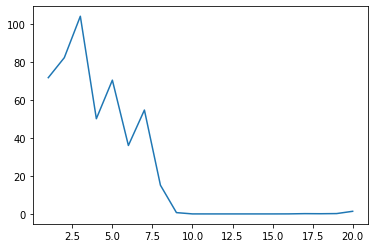

In [2]:
class eyeball:
    def __init__(self, deg, numcal):
        print("created")
        self.deg = deg
        self.numcal = numcal
        
        self.gx = 0
        self.gy = 0
        self.gz = 0
        self.r = 0
    
    # determine G, C, R
    def create_model(self):
        self.gx = random.uniform(20,50)
        self.gy = random.uniform(20,50)
        self.gz = random.uniform(20,50)
        self.r = random.uniform(1.05,1.35)
        self.ll = math.sqrt(self.gx**2 + self.gy**2 + self.gz**2)
        self.m = self.r/self.ll + 1
        self.cx = self.m * self.gx
        self.cy = self.m * self.gy
        self.cz = self.m * self.gz
    
    # eye movement(move pupil)
    def move(self):
        self.px = random.uniform(self.cx-self.r,self.cx+self.r)
        yrange = math.sqrt(self.r**2 - (self.cx - self.px)**2)
        self.py = random.uniform(self.cy - yrange, self.cy + yrange)
        self.pz = self.m*self.gz - math.sqrt(self.r**2 - (self.m*self.gx - self.px)**2 - (self.m*self.gy - self.py)**2)
        self.k = -self.cz/(self.cz - self.pz)
        self.sx = self.k*(self.cx - self.px) + self.cx
        self.sy = self.k*(self.cy - self.py) + self.cy
        return (self.px, self.py, self.sx, self.sy)
    
    def poly(self,px,py):
        row = np.zeros((self.deg+1)**2)
        for col, (j,i) in enumerate(np.ndindex((self.deg+1, self.deg+1))):
            row[col] = px**i * py**j
        return row
        
    def calibrate(self):
        self.trans = np.zeros((self.numcal, (self.deg+1)**2))
        self.b = np.zeros((self.numcal, 2))
        # number of calibration
        for row in range(self.numcal):
            px, py, sx, sy = self.move()
            self.trans[row] = self.poly(px-self.gx,py-self.gy)
            self.b[row] = [sx,sy]
        
    def lsq(self):
        self.create_model()
        
        # calibration
        self.calibrate()
        
        self.coef, _, _, _ = lstsq(self.trans, self.b, rcond=None)
        
        """
        print("S")
        print(self.b)
        print("sol")
        print(self.trans@self.coef)
        """
        
    def test(self):
        self.error = [0,0]
        
        iteration = 800
        numtest = 200
        for it in range(iteration):
            self.lsq()
        
            for i in range(numtest):
                #px,py,sx,sy = self.move()
                px,py,sx,sy = self.px,self.py,self.sx,self.sy
                row = self.poly(px-self.gx,py-self.gy)
                se = row@self.coef
                self.error += np.square(se-(sx,sy))
        mse = self.error/(iteration*numtest)
        mse = mse.mean()
        
        print("root of mse: ", np.sqrt(mse))
        return np.sqrt(mse)
        


x = []
y = []
for i in range(20):
    eye = eyeball(i+1,100)
    x += [i+1]
    y += [eye.test()]
plt.plot(x,y)


created
root of mse:  72.9112448577776
created
root of mse:  48.603414699380316
created
root of mse:  7.67384506480625e-13
created
root of mse:  8.89596936061547e-13
created
root of mse:  2.3139906624178525e-12
created
root of mse:  7.715842196479171e-12
created
root of mse:  4.128914215215162e-12
created
root of mse:  6.3939603951035635e-12
created
root of mse:  2.1826999572335077e-11
created
root of mse:  4.958433493560888e-11
created
root of mse:  8.716548036694595e-10
created
root of mse:  1.448943240269242e-10
created
root of mse:  3.011842198881077e-10
created
root of mse:  4.86146607982181e-10
created
root of mse:  2.1858483641616346e-09
created
root of mse:  4.495481506408881e-09
created
root of mse:  3.593112574030691e-08
created
root of mse:  5.9090231252011306e-08
created
root of mse:  8.987237536156996e-07
created
root of mse:  1.0999135404703038e-07


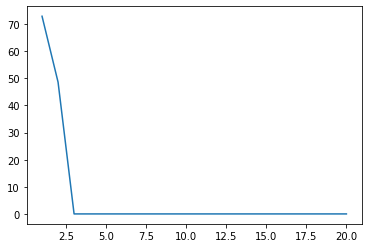

In [6]:
x = []
y = []
for i in range(20):
    eye = eyeball(i+1,10)
    x += [i+1]
    y += [eye.test()]
plt.plot(x,y)